# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Print to Log

print("Beginning Data Retrieval")
print("........................")

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

#list of city data

city_data = []

#create counters

record_count = 1
set_count =1


#loop through cities in the list 

for i, city in enumerate(cities):
    
    if(i % 50 == 0 and i >=50):
        
        set_count +=1
        record_count =1
        
    city_url = f"{url}&q={city}"
        
    print(f"Processing city #{record_count} in group# {set_count} | {city}")
    record_count +=1
    
    try:
        
        #run API requests and get data
        
        city_weather = requests.get(city_url).json()
        
        #add time delay
        time.sleep(2)
        
        #Parse out the information in the json objects
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city data into city_data list
        
        city_data.append({"City":city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except Exception as e:
        
        print(e)
    
    
    
#Print notification when API is finish running

print("---------------------")
print("Data Retrieval Complete")
print("---------------------")

        

Beginning Data Retrieval
........................
Processing city #1 in group# 1 | hilo
Processing city #2 in group# 1 | cidreira
Processing city #3 in group# 1 | punta arenas
Processing city #4 in group# 1 | ostersund
Processing city #5 in group# 1 | ola
Processing city #6 in group# 1 | batemans bay
Processing city #7 in group# 1 | viru
Processing city #8 in group# 1 | kabelvag
Processing city #9 in group# 1 | taolanaro
'coord'
Processing city #10 in group# 1 | bovolone
Processing city #11 in group# 1 | atuona
Processing city #12 in group# 1 | airai
Processing city #13 in group# 1 | tiksi
Processing city #14 in group# 1 | cherdyn
Processing city #15 in group# 1 | arman
Processing city #16 in group# 1 | hofn
Processing city #17 in group# 1 | puerto ayora
Processing city #18 in group# 1 | kununurra
Processing city #19 in group# 1 | raglan
Processing city #20 in group# 1 | maragogi
Processing city #21 in group# 1 | mamakan
Processing city #22 in group# 1 | yellowknife
Processing city #23

Processing city #36 in group# 4 | bozeman
Processing city #37 in group# 4 | kodiak
Processing city #38 in group# 4 | lazaro cardenas
Processing city #39 in group# 4 | vanimo
Processing city #40 in group# 4 | isangel
Processing city #41 in group# 4 | paita
Processing city #42 in group# 4 | mbuji-mayi
Processing city #43 in group# 4 | port hedland
Processing city #44 in group# 4 | ambala
Processing city #45 in group# 4 | kuito
Processing city #46 in group# 4 | kaitangata
Processing city #47 in group# 4 | lagoa
Processing city #48 in group# 4 | newcastle
Processing city #49 in group# 4 | baiao
Processing city #50 in group# 4 | ancud
Processing city #1 in group# 5 | raudeberg
Processing city #2 in group# 5 | ust-uda
Processing city #3 in group# 5 | barawe
'coord'
Processing city #4 in group# 5 | jinji
Processing city #5 in group# 5 | inyonga
Processing city #6 in group# 5 | santa rosalia
Processing city #7 in group# 5 | port hawkesbury
Processing city #8 in group# 5 | lander
Processing cit

Processing city #24 in group# 8 | tuy hoa
Processing city #25 in group# 8 | bonthe
Processing city #26 in group# 8 | attawapiskat
'coord'
Processing city #27 in group# 8 | sinkat
'coord'
Processing city #28 in group# 8 | goderich
Processing city #29 in group# 8 | gravdal
Processing city #30 in group# 8 | boli
Processing city #31 in group# 8 | olinda
Processing city #32 in group# 8 | bolshaya martynovka
Processing city #33 in group# 8 | metapan
Processing city #34 in group# 8 | ponta delgada
Processing city #35 in group# 8 | fiesole
Processing city #36 in group# 8 | verkh-usugli
Processing city #37 in group# 8 | dhidhdhoo
Processing city #38 in group# 8 | inuvik
Processing city #39 in group# 8 | beloha
Processing city #40 in group# 8 | milingimbi
'coord'
Processing city #41 in group# 8 | alcazar de san juan
Processing city #42 in group# 8 | kanye
Processing city #43 in group# 8 | pocatello
Processing city #44 in group# 8 | tucuma
Processing city #45 in group# 8 | port macquarie
Processi

Processing city #7 in group# 12 | guangshui
Processing city #8 in group# 12 | awjilah
Processing city #9 in group# 12 | kavieng
Processing city #10 in group# 12 | zatyshshya
Processing city #11 in group# 12 | homer
Processing city #12 in group# 12 | wanning
Processing city #13 in group# 12 | mount barker
Processing city #14 in group# 12 | tank
Processing city #15 in group# 12 | san carlos del zulia
Processing city #16 in group# 12 | mizan teferi
Processing city #17 in group# 12 | acucena
Processing city #18 in group# 12 | tambacounda
Processing city #19 in group# 12 | vestmannaeyjar
Processing city #20 in group# 12 | sioux lookout
Processing city #21 in group# 12 | do gonbadan
Processing city #22 in group# 12 | gaoua
Processing city #23 in group# 12 | batagay
Processing city #24 in group# 12 | tabasco
Processing city #25 in group# 12 | warqla
'coord'
Processing city #26 in group# 12 | panorama
Processing city #27 in group# 12 | jhikargachha
'coord'
Processing city #28 in group# 12 | sh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,78.53,65,40,10.36,US,1638132336
1,cidreira,-30.1811,-50.2056,72.30,87,100,8.61,BR,1638132338
2,punta arenas,-53.1500,-70.9167,50.11,62,75,29.93,CL,1638132158
3,ostersund,63.1792,14.6357,18.05,93,99,6.91,SE,1638132345
4,ola,59.5833,151.2833,14.83,87,100,4.21,RU,1638132347


In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,19.864356,16.103353,54.011885,72.376963,61.109948,7.465236,1.638133e+09
std,33.385518,91.112511,27.984436,20.801198,39.771684,5.599275,4.437306e+02
min,-54.800000,-175.200000,-39.030000,11.000000,0.000000,0.000000,1.638132e+09
25%,-6.416700,-64.616700,36.840000,61.000000,20.000000,3.440000,1.638133e+09
50%,23.613900,20.040300,62.650000,76.000000,75.000000,6.110000,1.638133e+09
75%,47.333500,94.665800,76.350000,89.000000,99.000000,9.710000,1.638133e+09
max,78.218600,179.316700,93.600000,100.000000,100.000000,38.880000,1.638134e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

over_city_data = city_data_pd[(city_data_pd["Humidity"] >100)].index

print(over_city_data)



Int64Index([], dtype='int64')


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


clean_city_data = city_data_pd.drop(over_city_data, inplace = False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,78.53,65,40,10.36,US,1638132336
1,cidreira,-30.1811,-50.2056,72.30,87,100,8.61,BR,1638132338
2,punta arenas,-53.1500,-70.9167,50.11,62,75,29.93,CL,1638132158
3,ostersund,63.1792,14.6357,18.05,93,99,6.91,SE,1638132345
4,ola,59.5833,151.2833,14.83,87,100,4.21,RU,1638132347


In [10]:
#Take relevant fields from the data frame


lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

#Create csv file for data

clean_city_data.to_csv(output_data_file, index_label ="City ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

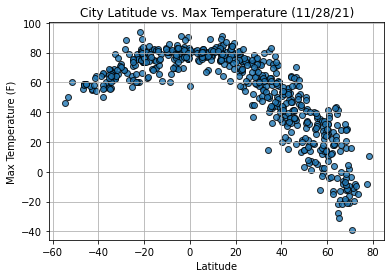

In [11]:
plt.scatter(lats, max_temps, edgecolors = "black", linewidths =1, marker="o",
            alpha=0.8, label = "Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure

plt.savefig("output_data/Fig1.png")

plt.show()


## Latitude vs. Humidity Plot

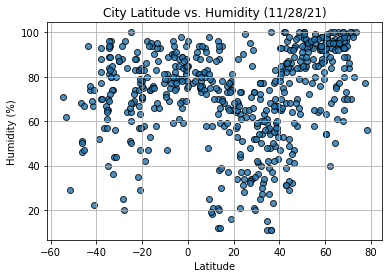

In [12]:
plt.scatter(lats, humidity, edgecolors = "black", linewidths =1, marker="o",
            alpha=0.8, label = "Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure

plt.savefig("output_data/Fig2.png")

plt.show()


## Latitude vs. Cloudiness Plot

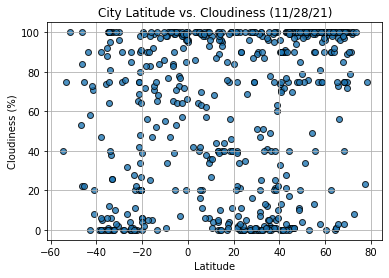

In [13]:
plt.scatter(lats, cloudiness, edgecolors = "black", linewidths =1, marker="o",
            alpha=0.8, label = "Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure

plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

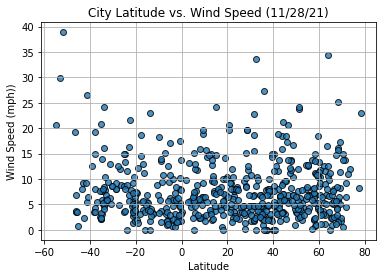

In [14]:
plt.scatter(lats, wind_speed, edgecolors = "black", linewidths =1, marker="o",
            alpha=0.8, label = "Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure

plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [15]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7766639137277144


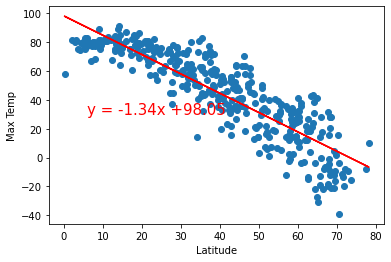

In [17]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5412206796455562


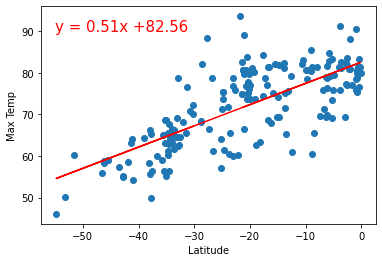

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14567536333540448


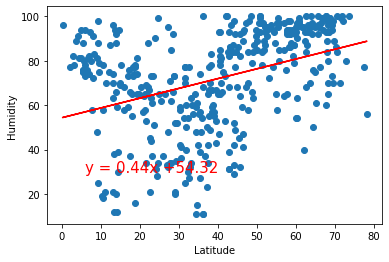

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08797227760123814


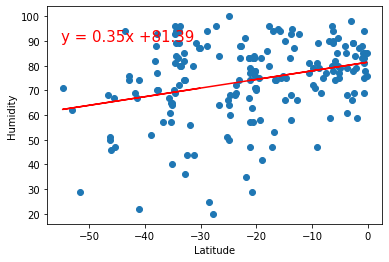

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-55,90))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08526283793693266


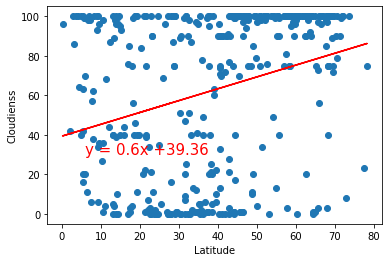

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudienss',(6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11852562345104348


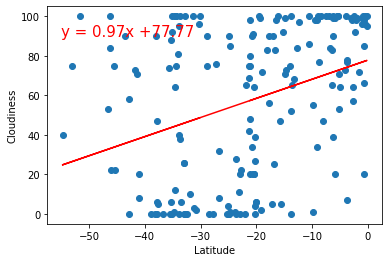

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,90))



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0015329913486810324


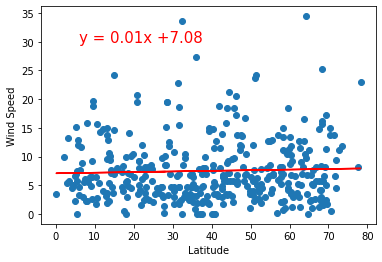

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0788935231462659


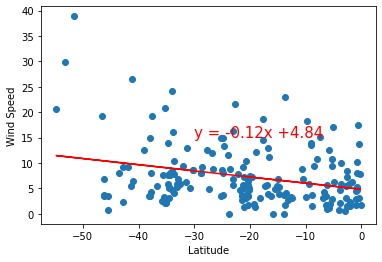

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-30,15))
